<a href="https://colab.research.google.com/github/hajeog/Seminar_class/blob/main/%ED%95%99%EA%B5%90%EC%88%98%EC%97%85_%EC%86%90%EC%8B%A4%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
1500/1500 - 4s - loss: 0.5991 - accuracy: 0.7911 - val_loss: 0.4272 - val_accuracy: 0.8468 - 4s/epoch - 3ms/step
Epoch 2/20
1500/1500 - 3s - loss: 0.4452 - accuracy: 0.8404 - val_loss: 0.3897 - val_accuracy: 0.8594 - 3s/epoch - 2ms/step
Epoch 3/20
1500/1500 - 3s - loss: 0.4106 - accuracy: 0.8519 - val_loss: 0.3705 - val_accuracy: 0.8657 - 3s/epoch - 2ms/step
Epoch 4/20
1500/1500 - 3s - loss: 0.3858 - accuracy: 0.8595 - val_loss: 0.3527 - val_accuracy: 0.8715 - 3s/epoch - 2ms/step
Epoch 5/20
1500/1500 - 3s - loss: 0.3677 - accuracy: 0.8651 - val_loss: 0.3489 - val_accuracy: 0.8734 - 3s/epoch - 2ms/step
Epoch 6/20
1500/1500 - 3s - loss: 0.3576 - accuracy: 0.8704 - val_loss: 0.3291 - val_accuracy: 0.8790 - 3s/epoch - 2ms/step
Epoch 7/20
1500/1500 - 3s - loss: 0.3478 - accuracy: 0.8724 - val_loss: 0.3332 - val_accuracy: 0.8775 - 3s/epoch - 2ms/step
Epoch 8/20
1500/1500 - 4s - loss: 0.3361 - accuracy: 0.8755 - val_loss: 0.3352 - val_accuracy: 0.8775 - 4s/epoch - 3ms/step
Epoch 9/

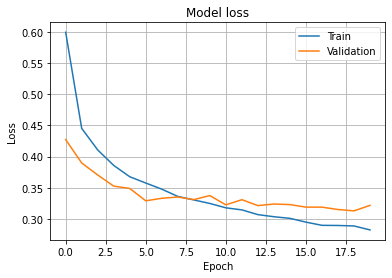

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

hist = model.fit(train_scaled, train_target, epochs=20, verbose=2, validation_data=(val_scaled, val_target))

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()